# Import Required Modules

In [1]:
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import yfinance as yf
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# 1) Fundamental data from FMP

## Read sample fundamental data

In [4]:
aapl_fundamental_data = pickle.load(open('./data/AAPL_FMP_FundamentalData.pkl','rb'))
aapl_fundamental_data.tail()

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,,,,,,,,,,,,,,,,,,,,,
2020-12-31,6.580349,1.697951,2.288912,2.082241,4.53649,3.910454,3.910454,3.910454,6.653688,2314861449980.237793,...,59304500000,5776500000,47.342492,85.621433,6.6691,1.901041,1.051139,13.495073,0.434208,-0.206671
2021-03-31,5.347189,1.410454,1.431404,1.29597,4.168329,4.129173,4.129173,4.129173,7.300873,2030688809206.523926,...,47445000000,5899500000,33.189409,70.118047,9.119697,2.711708,1.28355,9.868749,0.341583,-0.135435
2021-06-30,4.896998,1.307566,1.268479,1.142617,3.710062,3.86545,3.86545,3.86545,7.363838,2213535590439.371094,...,47586000000,5879000000,37.474765,78.754629,10.0916,2.401616,1.14279,8.918308,0.33827,-0.125862
2021-09-30,5.056068,1.246488,1.225199,1.029713,3.799269,3.826623,3.826623,3.826623,7.605391,2422287784345.757812,...,54763000000,6580000000,55.608685,102.284273,12.289877,1.618452,0.879901,7.3231,0.325741,-0.195486
2021-12-31,7.561438,2.112651,2.865226,2.694225,3.899102,4.388312,4.388312,4.388312,7.533802,2955919621703.448242,...,64562500000,6228000000,47.382065,96.017044,7.587157,1.899453,0.937334,11.862151,0.481427,-0.171001


In [5]:
aapl_fundamental_data.columns

Index(['revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare',
       'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare',
       'tangibleBookValuePerShare', 'shareholdersEquityPerShare',
       'interestDebtPerShare', 'marketCap', 'enterpriseValue', 'peRatio',
       'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio',
       'evToSales', 'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
       'tangibleAsse

## Plot Sample Column

<AxesSubplot:xlabel='index'>

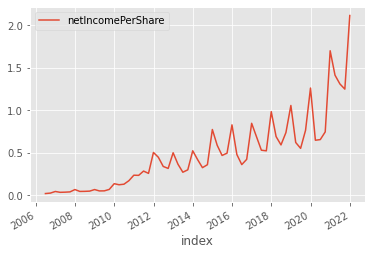

In [6]:
plot_col = 'netIncomePerShare'
aapl_fundamental_data[[plot_col]].plot()

## Stationarise by MCap

### Original Data

<AxesSubplot:xlabel='index'>

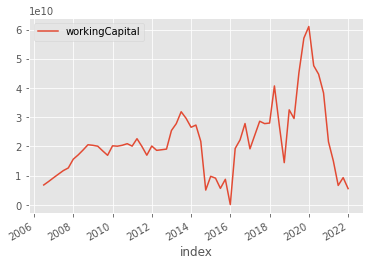

In [7]:
aapl_fundamental_data[['workingCapital']].plot()

### Stationarised by MCap

<AxesSubplot:xlabel='index'>

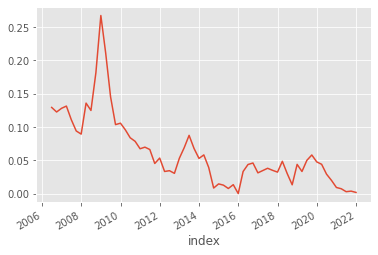

In [8]:
(aapl_fundamental_data['workingCapital'] / aapl_fundamental_data['marketCap']).plot()

## Stationarise by Price

### Price data

In [9]:
mkt_data = yf.download('AAPL',progress=False)
mkt_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100326,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095092,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088112,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090293,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092911,73449600


### Original Data

<AxesSubplot:xlabel='index'>

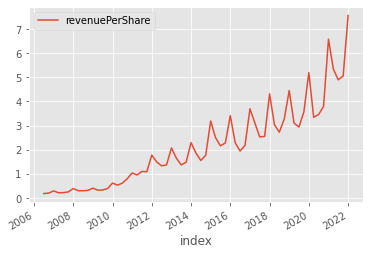

In [10]:
aapl_fundamental_data[['revenuePerShare']].plot()

### Stationarized by Price

<AxesSubplot:xlabel='index'>

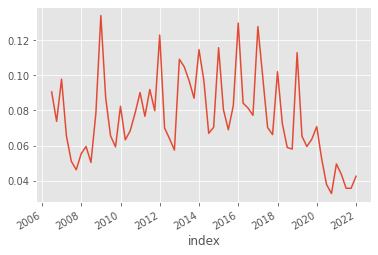

In [11]:
req_prices = pd.concat([mkt_data['Close'],aapl_fundamental_data[[]]],axis=1).fillna(method='ffill')
req_prices = req_prices.loc[aapl_fundamental_data.index,:]

aapl_fundamental_data = pd.concat([aapl_fundamental_data,req_prices],axis=1)

(aapl_fundamental_data['revenuePerShare'] / aapl_fundamental_data['Close']).plot()

## Target Data

In [12]:
def PlotTargetData(MktFactorData,MktPrices,Mkt='AAPL',BenchMarkMkt = '^GSPC',ReturnPeriod = 1,ExcessRetThresh = 0.1):
    BenchMark_Prices = yf.download(BenchMarkMkt,progress=False)
    BenchmarkReturnList = []
    MktActualReturnsList = []
    for Date in MktFactorData.index:
        StartDate = Date
        EndDate = StartDate + relativedelta(years=ReturnPeriod)
        PeriodPrices = MktPrices.loc[StartDate:EndDate,'Adj Close'].copy()
        
        BenchmarkReturns = np.nan
        ActualReturns = np.nan
        if (EndDate <= MktPrices.index.max()) & (not PeriodPrices.empty):
            PeriodReturns = (PeriodPrices.iloc[-1] / PeriodPrices.iloc[0]) - 1
            ActualReturns = PeriodReturns
            
            BenchmarkPeriodPrices = BenchMark_Prices.loc[StartDate:EndDate,'Adj Close'].copy()
            BenchmarkReturns = (BenchmarkPeriodPrices.iloc[-1] / BenchmarkPeriodPrices.iloc[0]) - 1
            
        BenchmarkReturnList.append(BenchmarkReturns)
        MktActualReturnsList.append(ActualReturns)
    
    MktReturnsInfo = pd.DataFrame({'MktReturns':MktActualReturnsList,
                                   'BenchMarkReturns':BenchmarkReturnList},
                                  index=MktFactorData.index)
    
    MktReturnsInfo.loc['2006':,:].plot()
    plt.title('Actual Returns\nMkt: {}, BenchMark: {}, RetPeriod: {}Yr'.format(Mkt,BenchMarkMkt,ReturnPeriod))
    plt.show()
    
    MktReturnsInfo['ExcessReturns'] = MktReturnsInfo['MktReturns'] - MktReturnsInfo['BenchMarkReturns']
    
    MktReturnsInfo.loc['2006':,'ExcessReturns'].plot()
    plt.axhline(ExcessRetThresh,color='green')
    plt.legend(['ExcessReturns','ExcessRetThresh'])
    plt.title('ExcessReturns, ExcessretThresh: {}\nMkt: {}, BenchMark: {}, RetPeriod: {}Yr'.format(ExcessRetThresh,Mkt,BenchMarkMkt,ReturnPeriod))
    plt.show()
    
    MktReturnsInfo['Signal'] = 0
    MktReturnsInfo.loc[MktReturnsInfo['ExcessReturns']>ExcessRetThresh,'Signal'] = 1
    
    PricePlot = MktPrices.copy()
    PricePlot = pd.concat([PricePlot,MktReturnsInfo[['Signal']]],axis=1)
    PricePlot = PricePlot.fillna(method='ffill')
    PricePlot = PricePlot.loc['2006':,:]
    
    MinPrice = PricePlot['Adj Close'].min() * 0.95
    MaxPrice = PricePlot['Adj Close'].max() * 1.05
    
    PricePlot['Adj Close'].plot()
    PricePlot['Signal'].replace({0:np.nan,1:MaxPrice}).plot(kind='area',color='green',alpha=0.25)
    plt.title('Prices & ExcessRet Based signals\nMkt: {}, BenchMark: {}, ExcessretThresh: {}, RetPriod: {}Yr'.format(Mkt,BenchMarkMkt,ExcessRetThresh,ReturnPeriod))
    plt.ylim(MinPrice, MaxPrice)
    plt.show()
    print('Distribution of the Signals:')
    print(MktReturnsInfo.loc['2006':,'Signal'].value_counts())

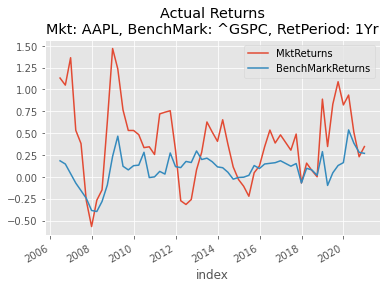

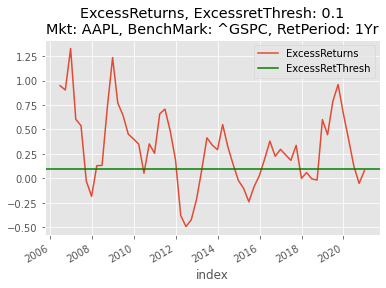

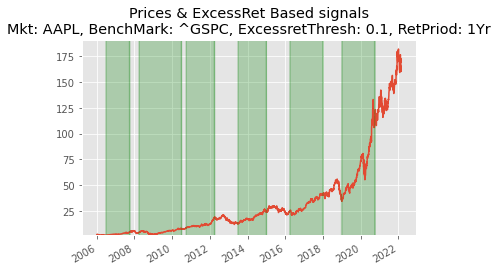

Distribution of the Signals:
1    39
0    23
Name: Signal, dtype: int64


In [13]:
PlotTargetData(aapl_fundamental_data,mkt_data,Mkt='AAPL',BenchMarkMkt = '^GSPC',ReturnPeriod = 1,ExcessRetThresh = 0.1)

# 2) Sector wise markets list

In [14]:
all_sect_mkts = pickle.load(open('./data/SectorWiseMktsList.pkl','rb'))
all_sect_mkts.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
10,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
12,AFL,Aflac,reports,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
14,AIG,AIG,reports,Financials,Property & Casualty Insurance,"New York City, New York",1980-03-31,5272,1919
23,ALL,Allstate,reports,Financials,Property & Casualty Insurance,"Northfield Township, Illinois",1995-07-13,899051,1931
27,AMZN,Amazon,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724,1994


In [15]:
all_sect_mkts['GICS Sector'].value_counts()

Financials                67
Consumer Discretionary    60
Energy                    21
Name: GICS Sector, dtype: int64

# 3) Indicator data, Actual returns, Excess returns

## Indicator Data

In [16]:
AllMktsIndicatorData = pickle.load(open('./data/AllMktsIndicatorData.pkl','rb'))
AllMktsIndicatorData.head()

,,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,enterpriseValue,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,Mkt,,,,,,,,,,,,,,,,,,,,,
2006-06-30,AAP,0.440994,0.023458,0.052645,0.027967,0.017412,0.297427,0.276373,0.297427,0.143152,1.093368,...,0.522788,0.690117,5.491744,86.191261,175.721352,16.388235,1.044189,0.512175,0.078871,-0.024679
2006-09-30,AAP,0.314924,0.01788,0.025904,0.010537,0.003695,0.265235,0.246163,0.265235,0.133333,1.147048,...,0.715763,0.948493,7.067425,106.821705,222.170543,12.734483,0.842525,0.405094,0.06741,-0.015367
2006-12-31,AAP,0.269087,0.009374,0.009692,-0.005614,0.002913,0.272967,0.256589,0.272967,0.135384,1.132471,...,0.58293,0.782933,8.590829,109.131486,244.876325,10.476289,0.824693,0.367532,0.03434,-0.015306
2007-06-30,AAP,0.339799,0.017614,0.043253,0.025676,0.003935,0.258757,0.244416,0.258757,0.094843,1.090307,...,0.519607,0.690511,5.517335,91.221827,184.578885,16.312222,0.986606,0.487596,0.06807,-0.017577
2007-09-30,AAP,0.324279,0.018959,0.025808,0.014801,0.023006,0.335955,0.31904,0.335955,0.144284,1.102263,...,0.524464,0.702519,7.000598,109.275124,231.449753,12.856044,0.823609,0.388853,0.056434,-0.011008


In [ ]:
AllMktsIndicatorData.shape

(8261, 56)

In [ ]:
AllMktsIndicatorData.columns

Index(['revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare',
       'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare',
       'tangibleBookValuePerShare', 'shareholdersEquityPerShare',
       'interestDebtPerShare', 'enterpriseValue', 'peRatio',
       'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio',
       'evToSales', 'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
       'tangibleAssetValue', 'net

## Actual returns

In [ ]:
AllMktsActualReturns = pickle.load(open('AllMktsActualReturns.pkl','rb'))
AllMktsActualReturns.head()

,,ActualRet_1Y
index,Mkt,
2006-06-30,AAP,0.411621
2006-09-30,AAP,0.011550
2006-12-31,AAP,0.074487
2007-06-30,AAP,-0.047348
2007-09-30,AAP,0.196836


## Excess returns

In [ ]:
AllMktsTargetData = pickle.load(open('AllMktsTargetData.pkl','rb'))
AllMktsTargetData.head()

,,ExcessRet_1Y
index,Mkt,
2006-06-30,AAP,0.228068
2006-09-30,AAP,-0.135244
2006-12-31,AAP,0.037949
2007-06-30,AAP,0.110231
2007-09-30,AAP,0.442906


# 4) Interested Sector data

## Sector Markets list

In [ ]:
interested_sector = 'Consumer Discretionary'
sector_mkts = list(all_sect_mkts.loc[all_sect_mkts['GICS Sector'] == interested_sector,:]['Symbol'])
print(sector_mkts)

['AAP', 'AMZN', 'APTV', 'AZO', 'BBWI', 'BBY', 'BKNG', 'BWA', 'CZR', 'KMX', 'CCL', 'CMG', 'DHI', 'DRI', 'DG', 'DLTR', 'DPZ', 'EBAY', 'ETSY', 'EXPE', 'F', 'GRMN', 'GPC', 'GM', 'HAS', 'HLT', 'HD', 'LVS', 'LEN', 'LKQ', 'LOW', 'MAR', 'MCD', 'MGM', 'MHK', 'NWL', 'NKE', 'NCLH', 'NVR', 'ORLY', 'PENN', 'POOL', 'PHM', 'PVH', 'RL', 'ROST', 'RCL', 'SBUX', 'TPR', 'TGT', 'TSLA', 'TJX', 'TSCO', 'ULTA', 'UAA', 'UA', 'VFC', 'WHR', 'WYNN', 'YUM']


## Sector Markets Indicators

In [ ]:
AllMktsIndicatorData.reset_index(inplace=True)
SecMktsIndicatorData = AllMktsIndicatorData.loc[AllMktsIndicatorData['Mkt'].isin(sector_mkts)].copy()
SecMktsIndicatorData.set_index(['index','Mkt'],inplace=True)
AllMktsIndicatorData.set_index(['index','Mkt'],inplace=True)
SecMktsIndicatorData.dropna(thresh=round(len(SecMktsIndicatorData) * 0.55),inplace=True,axis=1)
SecMktsIndicatorData.head()

,,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,Mkt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-06-30,AAP,0.440994,0.023458,0.052645,0.027967,0.017412,0.297427,0.276373,0.297427,0.143152,1.093368,14.352078,3.053809,25.580934,48.154356,4.527869,4.527869,3.338937,29.657963,27.969378,52.650439,0.017419,0.020767,0.420434,0.640673,2.532641,1.315136,None,2.244184,0.001523,0.087436,0.386863,0.0,0.025612,-0.468772,-0.055961,-1.947584,0.0,0.396216,0.089765,0.02907,-0.268063,0.089564,0.205221,-0.020216,0.0,0.119507,0.522788,0.690117,5.491744,86.191261,175.721352,16.388235,1.044189,0.512175,0.078871,-0.024679
2006-09-30,AAP,0.314924,0.01788,0.025904,0.010537,0.003695,0.265235,0.246163,0.265235,0.133333,1.147048,12.326996,2.799415,34.033492,83.667542,3.323851,3.323851,3.211062,26.794325,39.038035,95.970652,0.020281,0.011952,0.421179,0.6443,3.434941,1.28153,None,1.448808,0.002051,0.101113,0.376297,0.0,0.025543,-0.593229,-0.048796,-1.734281,0.0,0.326652,0.079197,0.024609,-0.254478,0.11156,0.279222,-0.037079,0.0,0.164238,0.715763,0.948493,7.067425,106.821705,222.170543,12.734483,0.842525,0.405094,0.06741,-0.015367
2006-12-31,AAP,0.269087,0.009374,0.009692,-0.005614,0.002913,0.272967,0.256589,0.272967,0.135384,1.132471,26.670001,3.716269,103.179479,-178.127074,3.66344,3.66344,4.208566,46.275605,116.847767,-201.723744,0.009374,-0.005614,0.462723,0.615729,5.413097,1.448338,None,1.033927,None,0.0,0.407695,0.0,0.023108,-1.579246,-0.056881,-1.63657,0.0,0.239941,0.041338,0.013506,-0.221569,0.132134,0.256589,-0.010592,0.0,0.136206,0.58293,0.782933,8.590829,109.131486,244.876325,10.476289,0.824693,0.367532,0.03434,-0.015306
2007-06-30,AAP,0.339799,0.017614,0.043253,0.025676,0.003935,0.258757,0.244416,0.258757,0.094843,1.090307,14.288042,2.962523,23.273739,39.20566,3.890375,3.890375,3.230059,28.010567,25.375512,42.746193,0.017497,0.025507,0.361373,0.597986,2.320027,1.4159,None,2.45565,0.002916,0.166649,0.391458,0.0,0.022294,-0.406368,-0.051727,-1.669194,0.0,0.320231,0.084931,0.027988,-0.18528,0.114272,0.242799,0.006668,0.0,0.117463,0.519607,0.690511,5.517335,91.221827,184.578885,16.312222,0.986606,0.487596,0.06807,-0.017577
2007-09-30,AAP,0.324279,0.018959,0.025808,0.014801,0.023006,0.335955,0.31904,0.335955,0.144284,1.102263,15.637792,3.65715,45.951518,80.126222,3.530043,3.530043,4.031143,32.533122,50.650677,88.320203,0.015987,0.01248,0.288773,0.578435,3.018288,1.4232,None,1.361243,0.001498,0.093728,0.38046,0.0,0.021217,-0.426511,-0.033945,-1.165908,0.0,0.378569,0.072492,0.024307,-0.202691,0.123641,0.26902,0.027112,0.0,0.119523,0.524464,0.702519,7.000598,109.275124,231.449753,12.856044,0.823609,0.388853,0.056434,-0.011008


## Sector Target data

In [ ]:
ExcessRetThresh = 0.1
SecMktsTargetData = AllMktsTargetData.loc[SecMktsIndicatorData.index].copy()
SecMktsTargetData['Signal'] = 0
SecMktsTargetData.loc[SecMktsTargetData['ExcessRet_1Y']>ExcessRetThresh,'Signal'] = 1
SecMktsTargetData.head()

,,ExcessRet_1Y,Signal
index,Mkt,,
2006-06-30,AAP,0.228068,1
2006-09-30,AAP,-0.135244,0
2006-12-31,AAP,0.037949,0
2007-06-30,AAP,0.110231,1
2007-09-30,AAP,0.442906,1


# 5) Train Test data

## Train Data

In [ ]:
X_Train = SecMktsIndicatorData.copy()
X_Train.reset_index(inplace=True)
X_Train = X_Train.loc[X_Train['index']<='2018']
X_Train.set_index(['index','Mkt'],inplace=True)
X_Train.dropna(inplace=True)
X_Train.head()

,,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,Mkt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-31,AAP,0.43382,0.024114,0.075425,0.062486,0.013116,0.303999,0.288076,0.303999,0.076193,1.061116,10.367449,2.305101,13.258146,16.003526,3.289485,3.289485,2.445979,20.323141,14.06843,16.981596,0.024114,0.062486,0.236488,0.606958,1.17053,1.260504,20.704507,3.127873,0.002932,0.121579,0.0,0.0,0.020587,-0.171548,-0.029826,-1.112081,0.002477,0.406127,0.102924,0.031832,-0.22281,0.098717,0.288076,0.008212,0.0,0.131318,0.612764,0.789985,4.678392,105.012847,175.617236,19.237377,0.857038,0.512478,0.079322,-0.012939
2009-06-30,AAP,0.336082,0.020409,0.035843,0.025523,0.032111,0.320901,0.30527,0.320901,0.072445,1.038942,12.2497,2.975463,27.89919,39.180115,3.116231,3.116231,3.091333,24.134796,28.985636,40.705861,0.020409,0.025523,0.220757,0.585189,0.904626,1.333441,24.593978,1.75628,0.001458,0.071455,0.0,0.0,0.020205,-0.287925,-0.030707,-1.180397,0.003967,0.38387,0.083013,0.026925,-0.195771,0.120415,0.30527,0.028837,0.0,0.129717,0.59774,0.773132,6.081874,128.201595,219.664545,14.798071,0.702019,0.409716,0.063598,-0.01032
2009-09-30,AAP,0.339577,0.01667,0.052351,0.041113,0.058152,0.34764,0.331218,0.34764,0.076597,1.017009,14.997368,2.944843,19.101793,24.323324,2.876539,2.876539,2.994931,26.888492,19.426696,24.737039,0.01667,0.041113,0.215193,0.591725,0.449698,1.366404,19.639446,3.140515,0.001521,0.091224,0.0,0.0,0.019286,-0.214672,-0.033095,-1.184114,0.00319,0.361093,0.061937,0.019962,-0.204097,0.145155,0.331218,0.037469,0.0,0.137806,0.640448,0.821325,6.628805,142.014718,232.619054,13.577108,0.633737,0.386899,0.047951,-0.011238
2009-12-31,AAP,0.326604,0.016038,0.05035,0.039541,0.055874,0.334353,0.318689,0.334353,0.073631,1.017232,14.814053,2.909778,18.874701,24.034156,2.842341,2.842341,2.959918,26.572943,19.199943,24.448303,0.016876,0.041607,0.215078,0.591598,0.450138,1.366599,19.647874,3.139452,0.001539,0.091194,0.409156,0.0,0.019267,-0.214672,-0.033094,-1.184114,0.003189,0.34735,0.061961,0.019968,-0.19627,0.146983,0.33534,0.038107,0.0,0.122062,0.648808,0.828158,6.629178,134.768367,232.615817,13.576344,0.667813,0.386904,0.047967,-0.010809
2010-03-31,AAP,0.288989,0.008718,0.018002,0.002762,0.02527,0.324055,0.3088,0.324055,0.052878,1.027373,27.622262,3.333221,53.507469,348.816993,2.972533,2.972533,3.424463,41.98885,54.972152,358.365309,0.009051,0.002867,0.158301,0.582818,1.118755,1.287858,11.656817,2.064928,0.000008,0.000899,0.424974,0.0,0.019525,-0.846603,-0.052739,-1.672499,0.005453,0.252124,0.035594,0.01145,-0.203487,0.110707,0.320577,0.025447,0.0,0.134417,0.618703,0.79783,7.318993,146.019483,246.6913,12.296774,0.616356,0.364828,0.026903,-0.015241


In [ ]:
Y_Train = SecMktsTargetData.loc[X_Train.index,:].copy()
Y_Train.drop('ExcessRet_1Y',axis=1,inplace=True)
Y_Train.head()

,,Signal
index,Mkt,
2009-03-31,AAP,0
2009-06-30,AAP,0
2009-09-30,AAP,1
2009-12-31,AAP,1
2010-03-31,AAP,1


## Test Data

In [ ]:
X_Test = SecMktsIndicatorData.copy()
X_Test.reset_index(inplace=True)
X_Test = X_Test.loc[X_Test['index']>'2018']
X_Test.set_index(['index','Mkt'],inplace=True)
X_Test.dropna(inplace=True)
X_Test.head()

,,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,Mkt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-30,AAP,0.186284,0.009431,0.023218,0.021029,0.072217,0.292868,0.167653,0.292868,0.084696,1.013831,21.941909,4.443645,35.652066,39.363229,2.826455,2.826455,4.505105,42.129151,36.145172,39.907666,0.011394,0.025404,0.285679,0.586012,0.574743,1.633685,13.029949,2.461783,0.000432,0.037929,0.359694,0.0,0.177003,-0.09428,-0.011751,-0.483467,0.002051,0.249297,0.031978,0.016199,-0.135948,0.220524,0.202534,0.067705,0.0,0.077172,0.322121,0.416405,25.684446,199.954191,285.845167,3.504066,0.450103,0.314856,0.032204,-0.002189
2019-06-30,AAP,0.265615,0.012822,0.018404,0.012887,0.048347,0.319168,0.182499,0.319168,0.068536,1.017078,21.514523,4.154176,59.954818,85.619482,3.457149,3.457149,4.225123,45.258722,60.97875,87.081724,0.01162,0.01168,0.210522,0.679897,0.759967,1.344965,13.914615,1.435382,0.000711,0.061214,0.366788,0.0,0.13707,-0.299753,-0.020769,-0.877327,0.003721,0.303441,0.030658,0.014902,-0.3839,0.120927,0.165395,-0.142902,0.0,0.065895,0.286538,0.362237,20.866178,179.055098,242.275803,4.3132,0.502639,0.371477,0.040172,-0.005517
2019-09-30,AAP,0.19582,0.01048,0.024149,0.019942,0.06278,0.308251,0.181098,0.308251,0.10115,1.03926,22.870992,4.896151,39.701928,48.078907,3.110349,3.110349,5.088375,51.991141,41.260632,49.966493,0.010931,0.020799,0.203457,0.674182,1.964071,1.363659,19.685533,2.30427,0.000377,0.03449,0.351314,0.0,0.134399,-0.174234,-0.021487,-0.938938,0.003619,0.269605,0.024766,0.012797,-0.346484,0.139247,0.188887,-0.14311,0.0,0.072021,0.309519,0.386433,27.516604,225.745142,297.657687,3.270752,0.39868,0.302361,0.033999,-0.004208
2020-06-30,AAP,0.27293,0.00441,0.001104,-0.007314,0.129474,0.357822,0.187143,0.357822,0.177375,1.055924,47.306215,3.057188,756.136156,-114.087187,2.331882,2.331882,3.228158,57.671021,798.422185,-120.467379,0.005285,-0.008765,0.350886,0.707019,3.054372,1.360366,6.405701,0.250252,0.002618,0.495389,0.39961,0.0,0.13975,-7.627704,-0.03084,-1.058845,0.005118,0.188418,0.01083,0.004197,-0.457481,0.211077,0.224285,-0.238065,0.0,0.094518,0.427685,0.544164,20.929918,195.143652,267.301883,4.300065,0.461199,0.336698,0.012323,-0.008417
2020-09-30,AAP,0.235765,0.017905,0.041218,0.035833,0.107591,0.35124,0.192622,0.35124,0.118172,1.010636,12.230094,3.715115,21.250566,24.444104,2.493725,2.493725,3.754629,29.112326,21.476583,24.704087,0.020441,0.04091,0.332841,0.687652,0.306376,1.441226,19.583147,2.302074,0.001875,0.091725,0.0,0.0,0.141055,-0.130647,-0.02284,-1.008651,0.004009,0.376162,0.035078,0.018537,-0.407804,0.210694,0.219914,-0.194624,0.0,0.090074,0.379908,0.47396,26.709712,212.083563,279.257852,3.369561,0.424361,0.322283,0.050975,-0.005385


In [ ]:
Y_Test = SecMktsTargetData.loc[X_Test.index,:].copy()
Y_Test.drop('ExcessRet_1Y',axis=1,inplace=True)
Y_Test.head()

,,Signal
index,Mkt,
2018-09-30,AAP,0
2019-06-30,AAP,0
2019-09-30,AAP,0
2020-06-30,AAP,0
2020-09-30,AAP,0


# 6) Scale the variables

In [ ]:
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train = pd.DataFrame(scaler.transform(X_Train),columns = X_Train.columns,index=X_Train.index)
X_Test = pd.DataFrame(scaler.transform(X_Test),columns = X_Test.columns,index=X_Test.index)

# 7) Random forest cross validation

## Parameter Grid

In [ ]:
params = {'max_depth' : [2, 3, 5, 10, 20],
          'min_samples_split' : [0.01,0.03,0.05],
          'criterion' : ["gini", "entropy"]}

## RF Grid search CV

In [ ]:
rf_model = RandomForestClassifier(random_state=123)
grid_cv_rf = GridSearchCV(rf_model,param_grid=params,n_jobs=-1,verbose=1)
grid_cv_rf.fit(X_Train,Y_Train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [0.01, 0.03, 0.05]},
             verbose=1)

## Train Test preds

In [ ]:
TrainPreds = pd.DataFrame(grid_cv_rf.predict(X_Train),index=Y_Train.index,columns=Y_Train.columns)
TestPreds = pd.DataFrame(grid_cv_rf.predict(X_Test),index=Y_Test.index,columns=Y_Test.columns)

## Metrics Function

In [ ]:
def get_metrics_new(y_true, y_pred,exp_name):
    acc_score_val = accuracy_score(y_true, y_pred)
    recall_score_val = recall_score(y_true, y_pred)
    precision_score_val = precision_score(y_true, y_pred)
    f1_score_val = f1_score(y_true, y_pred)
    scores = pd.DataFrame([[acc_score_val,recall_score_val,precision_score_val,f1_score_val]])
    scores.columns = ['accuracy','recall','precision','f1score']
    scores.index = [exp_name]
    return scores


## Train Test Metrics

In [ ]:
train_metrics = get_metrics_new(Y_Train, TrainPreds, 'Rf_Train')
test_metrics = get_metrics_new(Y_Test, TestPreds, 'Rf_Test')
metrics = pd.concat([train_metrics,test_metrics])
metrics

,accuracy,recall,precision,f1score
Rf_Train,0.731674,0.529586,0.836449,0.648551
Rf_Test,0.641844,0.410526,0.464286,0.435754


# 8) Test Returns Analysis

In [ ]:
all_test_returns = AllMktsActualReturns.loc[TestPreds.index,:].describe()
pred_test_returns = AllMktsActualReturns.loc[TestPreds.loc[TestPreds['Signal']==1].index,:].describe()
all_returns = pd.concat([all_test_returns,pred_test_returns],axis=1)
all_returns.columns = ['Full test','Pred test']
all_returns

,Full test,Pred test
count,282.000000,84.000000
mean,0.216795,0.439415
std,0.567030,0.827298
min,-0.736406,-0.549095
25%,-0.105757,-0.006498
50%,0.140341,0.217306
75%,0.392911,0.681413
max,4.351212,4.351212
